##  Decision Tree Model for Binary classification

#### Problem

Is to identify products at risk of backorder before the event occurs so the business has time to react. 

#### Data

Data file contains the historical data for the 8 weeks prior to the week we are trying to predict. The data was taken as weekly snapshots at the start of each week. Columns are defined as follows:

    sku - Random ID for the product

    national_inv - Current inventory level for the part

    lead_time - Transit time for product (if available)

    in_transit_qty - Amount of product in transit from source

    forecast_3_month - Forecast sales for the next 3 months

    forecast_6_month - Forecast sales for the next 6 months

    forecast_9_month - Forecast sales for the next 9 months

    sales_1_month - Sales quantity for the prior 1 month time period

    sales_3_month - Sales quantity for the prior 3 month time period

    sales_6_month - Sales quantity for the prior 6 month time period

    sales_9_month - Sales quantity for the prior 9 month time period

    min_bank - Minimum recommend amount to stock

    potential_issue - Source issue for part identified

    pieces_past_due - Parts overdue from source

    perf_6_month_avg - Source performance for prior 6 month period

    perf_12_month_avg - Source performance for prior 12 month period

    local_bo_qty - Amount of stock orders overdue

    deck_risk - Part risk flag

    oe_constraint - Part risk flag

    ppap_risk - Part risk flag

    stop_auto_buy - Part risk flag

    rev_stop - Part risk flag

    went_on_backorder - Product actually went on backorder. This is the target value.
    
         Yes or 1 : Product backordered

         No or 0  : Product not backordered

#### Loading the required libraries

In [4]:
# import os for operating system dependent functionalities
import os

# import other required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, roc_curve, auc
import itertools
from sklearn import tree

import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
# set working directory
os.chdir("/Users/Dippies/CODE PACKT - EML - FINAL/Chapter 3/Decision Tree")

# check working directory
os.getcwd()

'/Users/Dippies/CODE PACKT - EML - FINAL/Chapter 3/Decision Tree'

In [ ]:
# set working directory
os.chdir(".../Chapter 3/Decision Tree")

# check working directory
os.getcwd()

#### Loading the data

In [7]:
df_backorder = pd.read_csv("BackOrders.csv")

In [9]:
df_backorder.shape

(61589, 23)

In [161]:
df_backorder.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1888279,117,nan,0,0,0,0,0,0,15,...,0,-99.00,-99.00,0,No,No,Yes,Yes,No,No
1,1870557,7,2.00,0,0,0,0,0,0,0,...,0,0.50,0.28,0,Yes,No,No,Yes,No,No
2,1475481,258,15.00,10,10,77,184,46,132,256,...,0,0.54,0.70,0,No,No,No,Yes,No,No
3,1758220,46,2.00,0,0,0,0,1,2,6,...,0,0.75,0.90,0,Yes,No,No,Yes,No,No
4,1360312,2,2.00,0,4,6,10,2,2,5,...,0,0.97,0.92,0,No,No,No,Yes,No,No


In [10]:
df_backorder.describe()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty
count,6.158900e+04,61589.000000,58186.000000,61589.000000,6.158900e+04,6.158900e+04,6.158900e+04,61589.000000,61589.000000,6.158900e+04,6.158900e+04,61589.000000,61589.000000,61589.000000,61589.000000,61589.000000
mean,2.037188e+06,287.721882,7.559619,30.192843,1.692728e+02,3.150413e+02,4.535760e+02,44.742957,150.732631,2.835465e+02,4.196427e+02,43.087256,1.605400,-6.264182,-5.863664,1.205361
std,6.564178e+05,4233.906931,6.498952,792.869253,5.286742e+03,9.774362e+03,1.420201e+04,1373.805831,5224.959649,8.872270e+03,1.269858e+04,959.614135,42.309229,25.537906,24.844514,29.981155
min,1.068628e+06,-2999.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,-99.000000,-99.000000,0.000000
25%,1.498574e+06,3.000000,4.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.620000,0.640000,0.000000
50%,1.898033e+06,10.000000,8.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2.000000,4.000000e+00,6.000000e+00,0.000000,0.000000,0.820000,0.800000,0.000000
75%,2.314826e+06,57.000000,8.000000,0.000000,1.200000e+01,2.500000e+01,3.600000e+01,6.000000,17.000000,3.400000e+01,5.100000e+01,3.000000,0.000000,0.960000,0.950000,0.000000
max,3.284895e+06,673445.000000,52.000000,170976.000000,1.126656e+06,2.094336e+06,3.062016e+06,295197.000000,934593.000000,1.799099e+06,2.631590e+06,192978.000000,7392.000000,1.000000,1.000000,2999.000000


In [162]:
# To supress scientific notations
pd.options.display.float_format = '{:.2f}'.format

In [163]:
df_backorder.describe()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty
count,61589.00,61589.00,58186.00,61589.00,61589.00,61589.00,61589.00,61589.00,61589.00,61589.00,61589.00,61589.00,61589.00,61589.00,61589.00,61589.00
mean,2037187.68,287.72,7.56,30.19,169.27,315.04,453.58,44.74,150.73,283.55,419.64,43.09,1.61,-6.26,-5.86,1.21
std,656417.82,4233.91,6.50,792.87,5286.74,9774.36,14202.01,1373.81,5224.96,8872.27,12698.58,959.61,42.31,25.54,24.84,29.98
min,1068628.00,-2999.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-99.00,-99.00,0.00
25%,1498574.00,3.00,4.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.62,0.64,0.00
50%,1898033.00,10.00,8.00,0.00,0.00,0.00,0.00,0.00,2.00,4.00,6.00,0.00,0.00,0.82,0.80,0.00
75%,2314826.00,57.00,8.00,0.00,12.00,25.00,36.00,6.00,17.00,34.00,51.00,3.00,0.00,0.96,0.95,0.00
max,3284895.00,673445.00,52.00,170976.00,1126656.00,2094336.00,3062016.00,295197.00,934593.00,1799099.00,2631590.00,192978.00,7392.00,1.00,1.00,2999.00


In [11]:
# We drop sku as it will not be required for our modeling purpose
df_backorder.drop('sku', axis=1, inplace=True)

In [165]:
df_backorder.isnull().sum()

sku                     0
national_inv            0
lead_time            3403
in_transit_qty          0
forecast_3_month        0
forecast_6_month        0
forecast_9_month        0
sales_1_month           0
sales_3_month           0
sales_6_month           0
sales_9_month           0
min_bank                0
potential_issue         0
pieces_past_due         0
perf_6_month_avg        0
perf_12_month_avg       0
local_bo_qty            0
deck_risk               0
oe_constraint           0
ppap_risk               0
stop_auto_buy           0
rev_stop                0
went_on_backorder       0
dtype: int64

In [14]:
# Since the number of missing values is about 5%. 
# For initial analysis we ignore all these records
df_backorder = df_backorder.dropna(axis=0)

#### Dummy coding for categorical variables

In [16]:
non_numeric_attributes = df_backorder.select_dtypes(include=['object']).columns
df_backorder = pd.get_dummies(columns=non_numeric_attributes, data=df_backorder, prefix=non_numeric_attributes, prefix_sep="_",drop_first=True)

In [19]:
df_backorder.dtypes

national_inv               int64
lead_time                float64
in_transit_qty             int64
forecast_3_month           int64
forecast_6_month           int64
forecast_9_month           int64
sales_1_month              int64
sales_3_month              int64
sales_6_month              int64
sales_9_month              int64
min_bank                   int64
pieces_past_due            int64
perf_6_month_avg         float64
perf_12_month_avg        float64
local_bo_qty               int64
potential_issue_Yes        uint8
deck_risk_Yes              uint8
oe_constraint_Yes          uint8
ppap_risk_Yes              uint8
stop_auto_buy_Yes          uint8
rev_stop_Yes               uint8
went_on_backorder_Yes      uint8
dtype: object

In [17]:
print(df_backorder.columns, df_backorder.shape)

Index(['national_inv', 'lead_time', 'in_transit_qty', 'forecast_3_month',
       'forecast_6_month', 'forecast_9_month', 'sales_1_month',
       'sales_3_month', 'sales_6_month', 'sales_9_month', 'min_bank',
       'pieces_past_due', 'perf_6_month_avg', 'perf_12_month_avg',
       'local_bo_qty', 'potential_issue_Yes', 'deck_risk_Yes',
       'oe_constraint_Yes', 'ppap_risk_Yes', 'stop_auto_buy_Yes',
       'rev_stop_Yes', 'went_on_backorder_Yes'],
      dtype='object') (58186, 22)


In [20]:
# Target variable distribution
pd.value_counts(df_backorder['went_on_backorder_Yes'].values)

0    47217
1    10969
dtype: int64

In [21]:
#Performing train test split on the data
X, Y = df_backorder.loc[:,df_backorder.columns!='went_on_backorder_Yes'].values, df_backorder.loc[:,'went_on_backorder_Yes'].values

# Split our dataset into train & test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [22]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(46548, 21)
(11638, 21)
(46548,)
(11638,)


In [176]:
#To get the distribution in the target in train and test
print(pd.value_counts(Y_train))
print(pd.value_counts(Y_test))

0    37778
1     8770
dtype: int64
0    9439
1    2199
dtype: int64


In [28]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    #if normalize:
     #   cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
     #  print("Normalized confusion matrix")
    #else:
    #    print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [29]:
# Create an instance of DecisionTreeClassifier()
classifier = tree.DecisionTreeClassifier(random_state=1)

# Fit our model to the data
model_DT_Gini = classifier.fit(X_train, Y_train)
model_DT_Gini

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [30]:
# Predict with our test data
test_predictedvalues = model_DT_Gini.predict(X_test)

In [31]:
# Check accuracy
acc = accuracy_score(Y_test, test_predictedvalues)
print("Accuracy is", acc)

# Check TP, TN, FP, FN
tn, fp, fn, tp = confusion_matrix(Y_test, test_predictedvalues).ravel()
print("TN:",tn, " FP:",fp, " FN:",fn, " TP:",tp)

Accuracy is 0.901099845334
TN: 8785  FP: 654  FN: 497  TP: 1702


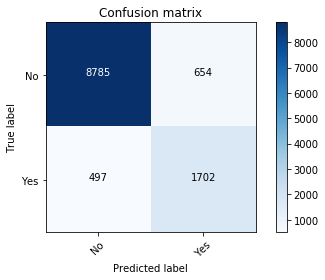

In [32]:
target_names = [ 'No', 'Yes']

#Pass Actual & Predicted values to confusion_matrix()
cm = confusion_matrix(Y_test, test_predictedvalues)

plt.figure()
plot_confusion_matrix(cm, classes=target_names, normalize=False)
plt.show()

### Changing Hyper-Parameters

### Grid Search for hyper-parameter tuning

###### Parameters

* criterion : string, optional (default=”gini”)

    The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.
    
* min_samples_split : int, float, optional (default=2)

    The minimum number of samples required to split an internal node.
   
* max_depth : int or None, optional (default=None)

    The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
    
* min_samples_leaf : int, float, optional (default=1)

    The minimum number of samples required to be at a leaf node.
    
* max_leaf_nodes : int or None, optional (default=None)

    Grow a tree with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.

In [39]:
# set the parameters for grid search
grid_search_parameters = {"criterion": ["gini", "entropy"],
              "min_samples_split": [2,3],
              "max_depth": [None, 2, 3],
              "min_samples_leaf": [1, 5],
              "max_leaf_nodes": [None],
              }

In [40]:
from sklearn.model_selection import GridSearchCV

# Create an instance of DecisionTreeClassifier()
classifier = tree.DecisionTreeClassifier()

# Use GridSearchCV(), pass the values you have set for grid search
model_DT_Grid = GridSearchCV(classifier, grid_search_parameters, cv=10)
model_DT_Grid.fit(X_train, Y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'criterion': ['gini', 'entropy'], 'min_samples_split': [2, 3], 'max_depth': [None, 2, 3], 'min_samples_leaf': [1, 5], 'max_leaf_nodes': [None]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [41]:
model_DT_Grid.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'max_leaf_nodes': None,
 'min_samples_leaf': 1,
 'min_samples_split': 3}

Accuracy is 0.901099845334
TN: 8813  FP: 626  FN: 533  TP: 1666


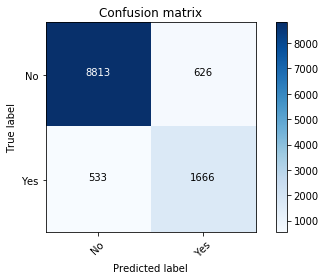

In [42]:
test_predictedvalues = model_DT_Grid.predict(X_test)

cc = accuracy_score(Y_test, test_predictedvalues)
print("Accuracy is", acc)

tn, fp, fn, tp = confusion_matrix(Y_test, test_predictedvalues).ravel()
print("TN:",tn, " FP:",fp, " FN:",fn, " TP:",tp)

cm = confusion_matrix(Y_test, test_predictedvalues)

plt.figure()
plot_confusion_matrix(cm, classes=target_names, normalize=False)
plt.show()

In [255]:
model_DT_Grid

GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'criterion': ['gini', 'entropy'], 'min_samples_split': [2], 'max_depth': [None, 2, 3], 'min_samples_leaf': [1, 5], 'max_leaf_nodes': [None]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [260]:
from sklearn.metrics import classification_report

target_names = [ 'No', 'Yes']
print(classification_report(Y_test, test_predictedvalues, target_names=target_names))

             precision    recall  f1-score   support

         No       0.89      0.95      0.92      9439
        Yes       0.70      0.48      0.56      2199

avg / total       0.85      0.86      0.85     11638

